# State Detection Visualization
In this notebook, we visualize predicted state detections.

In [26]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [27]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import plot_state_detection

sns.set_theme()
sns.set_color_codes()

import os


We start by loading a data set and the competitor results.

In [28]:
dataset = "UTSA"
competitor = "CLaP"

In [29]:
if dataset == "TSSB":
    df_data = load_tssb_datasets()
elif dataset == "HAS":
    df_data = load_has_datasets()
else:
    df_data = load_datasets(dataset)
    
df_data

,dataset,window_size,change_points,labels,time_series
0,Cane,100,[2345],"[0, 1]","[0.6430348360895372, 0.640236329044896, 0.6389..."
1,DutchFactory,24,[2184],"[0, 1]","[0.293470286133529, 0.30520909757887016, 0.303..."
2,EEGRat,10,[1000],"[0, 1]","[0.4392813160160028, 0.45469460643883336, 0.45..."
3,EEGRat2,10,[1000],"[0, 1]","[0.22341782046713707, 0.24470143792832674, 0.2..."
4,Fetal2013,70,"[6000, 12000]","[0, 1, 2]","[0.4611362844196584, 0.44963401882188914, 0.43..."
5,GrandMalSeizures,10,[8200],"[0, 1]","[0.405618531296205, 0.4046328240512568, 0.4046..."
6,GrandMalSeizures2,10,[4550],"[0, 1]","[0.43912448700410395, 0.5047879616963065, 0.46..."
7,GreatBarbet1,50,"[1900, 3700]","[0, 1, 2]","[0.7629191217074215, 0.748821253924351, 0.7760..."
8,GreatBarbet2,50,"[1900, 3700]","[0, 1, 2]","[0.7492288725110254, 0.46960521562889157, 0.40..."
9,InsectEPG1,50,[3802],"[0, 1]","[0.5346737424321699, 0.5292024815008597, 0.489..."


In [30]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores = pd.read_csv(f"../../experiments/state_detection/{dataset}_{competitor}.csv.gz", converters=converters)
df_scores.sort_values(by="ami_score", ascending=False)

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami_score
16,PigInternalBleedingDatasetCVP,[7501],[7499],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,0.998
13,NogunGun,[3000],[3001],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,0.998
18,PulsusParadoxusECG1,[10000],[9997],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,0.998
19,PulsusParadoxusECG2,[10000],[10005],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.999,0.996
4,Fetal2013,"[6000, 12000]","[6002, 12011]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.999,0.995
24,SimpleSynthetic,"[3000, 5000]","[3000, 4995]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.999,0.992
8,GreatBarbet2,"[1900, 3700]","[1897, 3705]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.997,0.989
1,DutchFactory,[2184],[2166],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.996,0.977
23,RoboticDogActivityZ,[4000],[4054],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.990,0.958
15,PigInternalBleedingDatasetArtPressureFluidFilled,[7501],[7614],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.985,0.943


Now, we plot the state detection for a given time series.

<Axes: >

<Figure size 640x480 with 0 Axes>

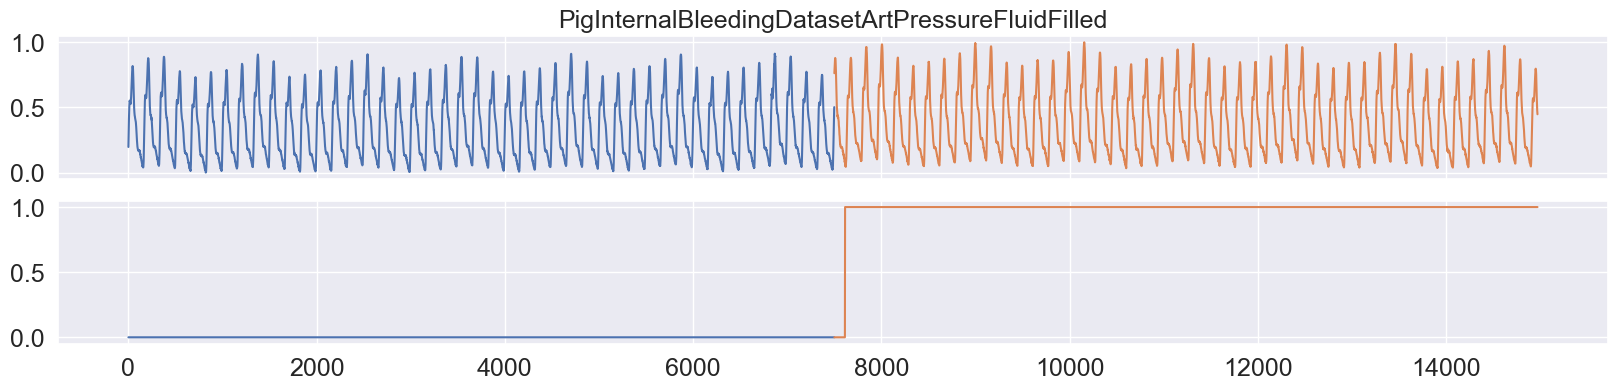

In [46]:
idx = 15 # 83 120
data_row = df_data.iloc[idx]

plot_state_detection(data_row.dataset, data_row.time_series, df_scores.iloc[idx].found_labels, change_points=data_row.change_points, labels=data_row.labels, file_path="../../tmp/clap_example.pdf")